<a href="https://colab.research.google.com/github/teazaw/MAT422-Mathematical-Methods-in-Data-Science/blob/main/HW10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **3.5 *K*-means**
***K*-means clustering** is an unsupervised machine learning algorithm used to group data points into *k* amounts of clusters. It minimizes within-cluster variances (squared Euclidean distances), but not regular Euclidean distances.
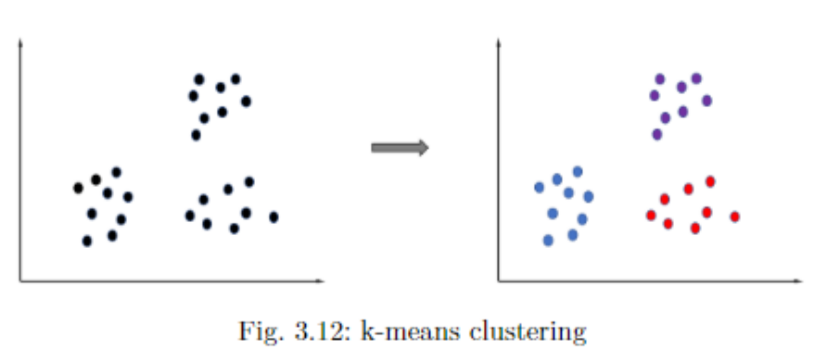

The objective of k-means clustering is to minimize the sum of squared distances between data points and their respective cluster centroids.

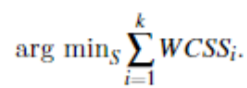


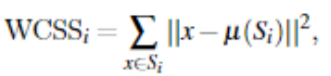

**The *K*-means clustering algorithm proceeds as follows**:
1. Clusters the data into k groups where k is predefined.
2. Select k points at random as cluster centers.
3. Assign objects to their closest cluster center according to the Euclidean distance function.
4. Calculate the centroid or mean of all objects in each cluster.
5. Repeat steps 2,3,and 4 until the same points are assigned to each cluster in consecutive rounds.


The following coding example creates synthetic data with four distinct clusters. Then, we implement our KMeans model with *k* = 4.

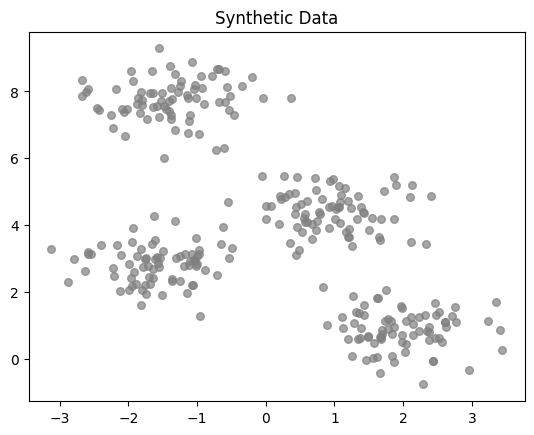

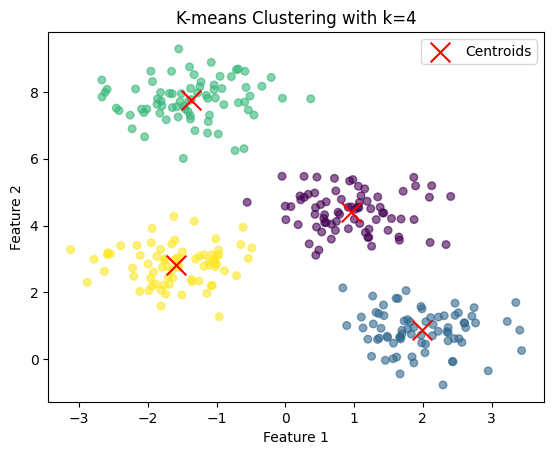

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# synthetic data
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=30, c='gray', marker='o', alpha=0.7)
plt.title("Synthetic Data")
plt.show()

# KMeans
k = 4
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(X)
centers = kmeans.cluster_centers_
labels = kmeans.labels_

# visualize
plt.scatter(X[:, 0], X[:, 1], c=labels, s=30, cmap='viridis', marker='o', alpha=0.6)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='x', label='Centroids')
plt.title(f"K-means Clustering with k={k}")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


# **3.6 Support Vector Machines**
**Support-vector machines** (SVMs) are supervised learning models in machine learning which aim to analyze data for classification and regression analysis. The objective of the support vector machine algorithm is to find a **hyperplane** (which is a decision boundary that separates classes of data) in a high dimensional space of the number of features that distinctly classifies the data points. Thus, an SVM maps training examples to points in space as to maximize the width of the gap between the two categories. Predictions of new data are based on which side of the gap they fall.

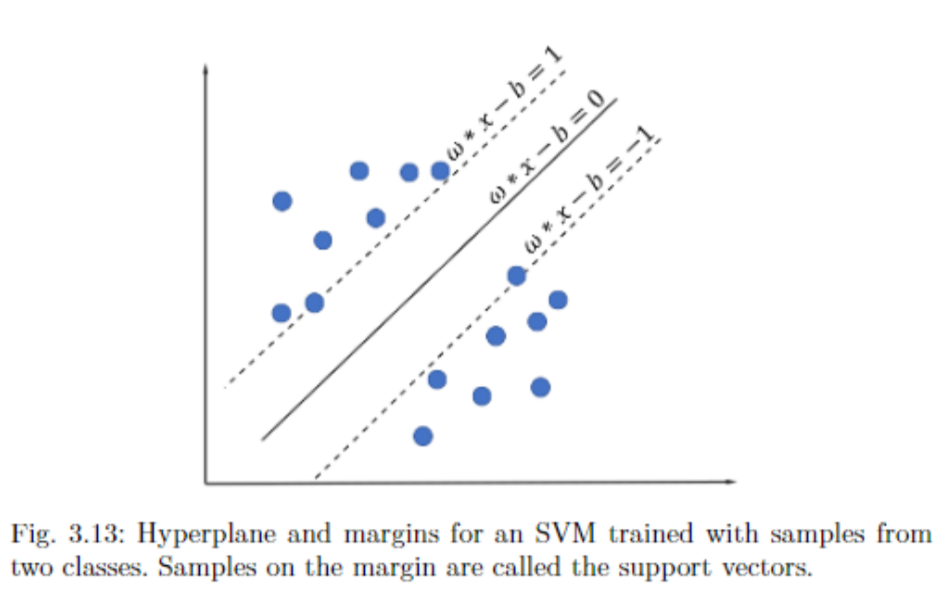



The following coding example classifies a synthetic dataset with two classes using an SVM.

Test set accuracy: 0.93


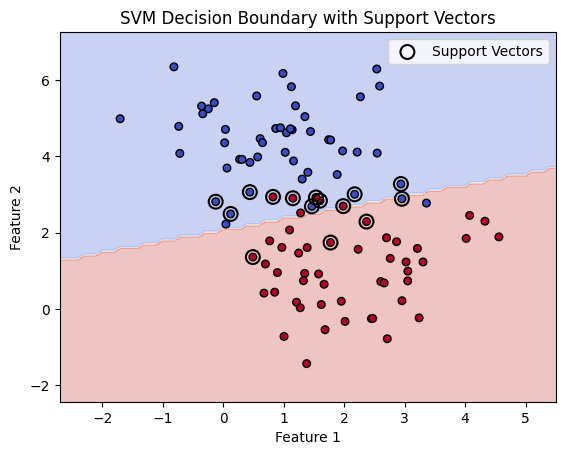

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# make synthetic data set
X, y = datasets.make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=1.05)

# split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# initialize model
model = SVC(kernel='linear', C=1.0)
model.fit(X_train, y_train)
accuracy = model.score(X_test, y_test)
print(f"Test set accuracy: {accuracy:.2f}")

# plot decision boundary
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')

    # plot data points
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap='coolwarm', edgecolors='k')
    plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
                s=100, facecolors='none', edgecolors='k', linewidth=1.5, label='Support Vectors')

    plt.title("SVM Decision Boundary with Support Vectors")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.show()
plot_decision_boundary(X, y, model)


**Advantages of SVM:**
1. Effective in high-dimensional spaces
2. Memory efficient
3. Versatile

**Disadvantages of SVM:**
1. Computationally intensive
2. Sensitive to the choice of kernel
3. Less effective for large datasets

Some applications of SVM include text classification and image classification